<a href="https://colab.research.google.com/github/Movya777/Supervised-Unsupervised-ML-algorithms/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
X,y=make_blobs(n_samples=1000, centers=3, n_features=2)

Though we initialized centers as 3, lets validate it with the elbow method

In [3]:
X

array([[ 0.59483248,  8.80499981],
       [-4.04088041, -4.61499588],
       [ 2.13109876, 11.24083981],
       ...,
       [ 2.51950207,  8.45420056],
       [ 7.02085491, -6.97258086],
       [-4.91887135, -6.46269901]])

In [4]:
y

array([1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 0, 2, 0, 2, 2, 1, 2, 0,
       0, 0, 1, 2, 0, 1, 0, 2, 0, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0,
       2, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 2, 2, 1, 2, 0, 2, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1,
       1, 0, 0, 2, 1, 0, 1, 1, 0, 2, 0, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0,
       0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 1, 0, 2, 1, 2, 1, 0, 0, 1, 2, 2, 2,
       0, 2, 2, 2, 2, 1, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 1, 1, 0, 2, 0, 1,
       1, 2, 0, 1, 0, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 0, 1, 2, 2, 0,
       1, 0, 0, 1, 0, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 1, 2, 0, 2, 0,
       1, 1, 1, 2, 2, 2, 2, 2, 0, 1, 1, 2, 0, 2, 1, 2, 0, 2, 1, 1, 1, 2,
       2, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 2, 2, 2, 0, 0, 1, 0, 1, 1, 2,

Since it is an unsupervised training,we shall use only X

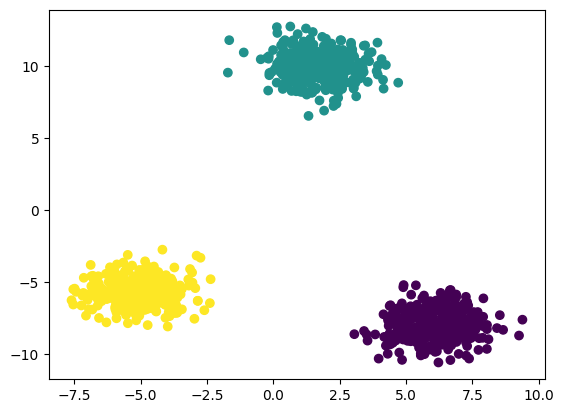

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
## Standardization --> feature scaling technique
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [8]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [9]:
from sklearn.cluster import KMeans

In [10]:
## Elbow Method to select K value
wcss=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X_train_scaled)
  wcss.append(kmeans.inertia_)

In [11]:
wcss

[1340.000000000001,
 710.0668436836952,
 42.00228905082495,
 34.06518004097207,
 27.45197106843086,
 21.07379973218854,
 25.9010600844441,
 17.76239045803007,
 16.681747728219367,
 14.929788293633253]

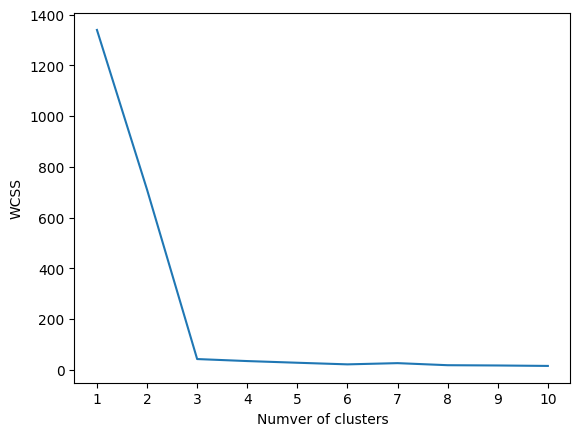

In [12]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Numver of clusters")
plt.ylabel("WCSS")
plt.show()

From the plot it is evident that the knucle point is at 3, so K should be 3


In [16]:
kmeans=KMeans(n_clusters=3,init="k-means++")

In [17]:
kmeans.fit_predict(X_train_scaled)

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 1,
       0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2, 1, 0, 0, 1, 2,
       2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 1, 0, 1, 1,
       2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 2, 0, 1, 0, 2, 1, 2, 1, 0,
       1, 1, 2, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0, 1, 0, 1, 0,
       0, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 0, 1, 2, 0, 2, 2, 2, 1, 1, 2,
       1, 1, 1, 0, 0, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 1, 2, 1,
       2, 2, 0, 1, 0, 1, 0, 1, 0, 0, 2, 2, 0, 1, 1, 2, 0, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 2, 1, 2, 1, 1, 2, 1, 1, 2, 0, 1, 0, 1, 0, 2, 2, 1, 1, 1, 0,
       1, 1, 2, 1, 2, 1, 1, 0, 0, 0, 2, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1,
       2, 0, 0, 0, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 1, 2, 0, 2, 2, 0, 1, 0,
       0, 1, 1, 2, 0, 1, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 2, 2, 0, 1, 0, 1,
       1, 0, 0, 1, 2, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1,

In [18]:
y_pred=kmeans.predict(X_test_scaled)

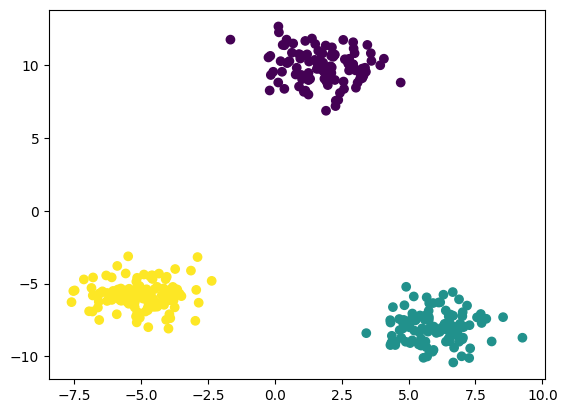

In [19]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

Validating the k value with 2 other methods:

1. kneelocator
2. Silhoutee scoring

In [20]:
 # kneelocator
 !pip install kneed

In [21]:
from kneed import KneeLocator
k1=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [22]:
k1.elbow

np.int64(3)

In [23]:
# Silhoutee score
from sklearn.metrics import silhouette_score

In [24]:
silhouette_coefficients=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,init="k-means++")
  kmeans.fit(X_train_scaled)
  score=silhouette_score(X_train_scaled,kmeans.labels_)
  silhouette_coefficients.append(score)

In [25]:
silhouette_coefficients

[np.float64(0.5697339073225549),
 np.float64(0.8672402951792176),
 np.float64(0.7061561574229048),
 np.float64(0.5558206822276225),
 np.float64(0.4188230166809661),
 np.float64(0.39097645188848296),
 np.float64(0.3561778258773862),
 np.float64(0.3166411198406966),
 np.float64(0.3381717811952509)]

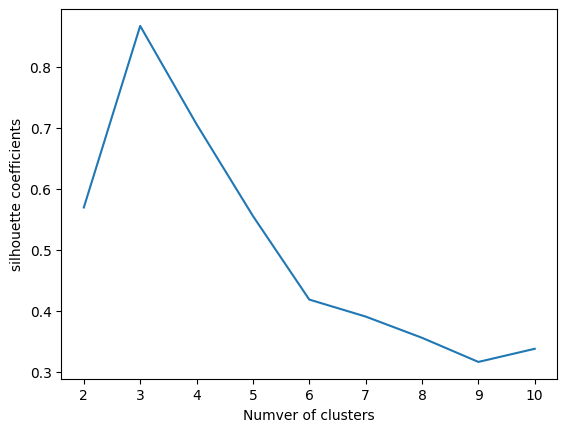

In [26]:
## plot silhouette_score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Numver of clusters")
plt.ylabel("silhouette coefficients")
plt.show()

Highest score one is picked